In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("heart_disease.csv")

In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
df_clean = df.copy()

In [6]:
df_clean[df_clean.RestingBP == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [7]:
df_clean[df_clean.RestingBP != 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [8]:
df_clean = df_clean[df_clean.RestingBP != 0]

In [9]:
df_clean[df_clean.Cholesterol == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [10]:
hd_mask = df_clean.HeartDisease == 0

In [14]:
hd_mask.shape

(917,)

In [12]:
hd_mask.sum()

410

In [16]:
(~hd_mask).sum()

507

In [23]:
cmwohd = df_clean[hd_mask]["Cholesterol"].median()

In [24]:
cmwhd  = df_clean.loc[~hd_mask, "Cholesterol"].median()

In [25]:
print(cmwohd,cmwhd)

227.0 217.0


In [27]:
df_clean.loc[hd_mask, "Cholesterol"].sum()

93120

In [29]:
df_clean.loc[hd_mask, "Cholesterol"].replace(0,cmwohd)

0      289
2      283
4      195
5      339
6      237
      ... 
903    221
904    240
906    342
910    157
917    175
Name: Cholesterol, Length: 410, dtype: int64

In [30]:
df_clean.loc[hd_mask, "Cholesterol"] = df_clean.loc[hd_mask, "Cholesterol"].replace(0,cmwohd)

In [31]:
df_clean.loc[hd_mask, "Cholesterol"].sum()

97660

In [32]:
df_clean.loc[~hd_mask, "Cholesterol"] = df_clean.loc[~hd_mask, "Cholesterol"].replace(0,cmwhd)

In [34]:
df_clean[["RestingBP","Cholesterol"]].describe()

,RestingBP,Cholesterol
count,917.000000,917.000000
mean,132.540894,239.700109
std,17.999749,54.352727
min,80.000000,85.000000
25%,120.000000,214.000000
50%,130.000000,225.000000
75%,140.000000,267.000000
max,200.000000,603.000000


In [35]:
df_clean

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [36]:
pd.get_dummies(df_clean["Sex"])

,F,M
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True
...,...,...
913,False,True
914,False,True
915,False,True
916,True,False


In [37]:
pd.get_dummies(df_clean["Sex"], drop_first=True)

,M
0,True
1,False
2,True
3,False
4,True
...,...
913,True
914,True
915,True
916,False


In [39]:
df_clean = pd.get_dummies(df_clean,drop_first=True)

In [49]:
df_clean 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [44]:
# df_clean['ChestPainType_ATA'].map({True:1,False:0})

In [46]:
df_clean.drop(["HeartDisease"], axis = 1).columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [47]:
X = df_clean.drop(["HeartDisease"], axis = 1)

In [48]:
y = df_clean.HeartDisease

In [ ]:
40	140	289	0	172	0.0	0	True	True	False	False	True	False	False	False	True

In [51]:
df_clean.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.263084,0.026756,0.198170,-0.382280,0.258563,0.282012,0.055670,-0.218113,-0.011681,0.032083,-0.230793,0.136903,0.216017,0.185499,-0.258027
RestingBP,0.263084,1.000000,0.092169,0.067823,-0.109693,0.174252,0.117990,0.009427,-0.051374,-0.027536,0.049464,-0.113759,0.089156,0.153064,0.110171,-0.105969
Cholesterol,0.026756,0.092169,1.000000,-0.023912,0.037959,0.057086,0.024914,-0.132268,0.020929,-0.053205,-0.038277,-0.046147,-0.049264,0.058131,0.067999,-0.055602
FastingBS,0.198170,0.067823,-0.023912,1.000000,-0.131067,0.053062,0.267994,0.120424,-0.140844,-0.038201,0.026752,-0.092588,0.126853,0.059988,0.107683,-0.162346
MaxHR,-0.382280,-0.109693,0.037959,-0.131067,1.000000,-0.161213,-0.401410,-0.189668,0.254214,0.133411,0.100235,0.023181,-0.157561,-0.370023,-0.343641,0.384339
Oldpeak,0.258563,0.174252,0.057086,0.053062,-0.161213,1.000000,0.403638,0.105444,-0.261903,-0.107615,0.032382,-0.117293,0.056283,0.409494,0.282874,-0.450299
HeartDisease,0.282012,0.117990,0.024914,0.267994,-0.401410,0.403638,1.000000,0.305118,-0.401680,-0.215311,-0.054591,-0.092452,0.103067,0.495490,0.553700,-0.621843
Sex_M,0.055670,0.009427,-0.132268,0.120424,-0.189668,0.105444,0.305118,1.000000,-0.161294,-0.067682,-0.003903,-0.011098,0.064009,0.191226,0.115596,-0.150537
ChestPainType_ATA,-0.218113,-0.051374,0.020929,-0.140844,0.254214,-0.261903,-0.401680,-0.161294,1.000000,-0.256306,-0.110817,0.108422,-0.046381,-0.300947,-0.304346,0.357324
ChestPainType_NAP,-0.011681,-0.027536,-0.053205,-0.038201,0.133411,-0.107615,-0.215311,-0.067682,-0.256306,1.000000,-0.122150,0.003352,-0.041317,-0.164722,-0.074256,0.095585


In [52]:
df_clean.corr()["HeartDisease"]

Age                  0.282012
RestingBP            0.117990
Cholesterol          0.024914
FastingBS            0.267994
MaxHR               -0.401410
Oldpeak              0.403638
HeartDisease         1.000000
Sex_M                0.305118
ChestPainType_ATA   -0.401680
ChestPainType_NAP   -0.215311
ChestPainType_TA    -0.054591
RestingECG_Normal   -0.092452
RestingECG_ST        0.103067
ExerciseAngina_Y     0.495490
ST_Slope_Flat        0.553700
ST_Slope_Up         -0.621843
Name: HeartDisease, dtype: float64

In [54]:
abs(df_clean.corr()["HeartDisease"]).sort_values(ascending = False)

HeartDisease         1.000000
ST_Slope_Up          0.621843
ST_Slope_Flat        0.553700
ExerciseAngina_Y     0.495490
Oldpeak              0.403638
ChestPainType_ATA    0.401680
MaxHR                0.401410
Sex_M                0.305118
Age                  0.282012
FastingBS            0.267994
ChestPainType_NAP    0.215311
RestingBP            0.117990
RestingECG_ST        0.103067
RestingECG_Normal    0.092452
ChestPainType_TA     0.054591
Cholesterol          0.024914
Name: HeartDisease, dtype: float64

In [55]:
corr = abs(df_clean.corr()["HeartDisease"]).sort_values(ascending = False)

In [61]:
features = corr["ST_Slope_Up":"Sex_M"].index.to_list()

In [67]:
features

['ST_Slope_Up',
 'ST_Slope_Flat',
 'ExerciseAngina_Y',
 'Oldpeak',
 'ChestPainType_ATA',
 'MaxHR',
 'Sex_M']

In [64]:
correlations = abs(df_clean.corr())

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

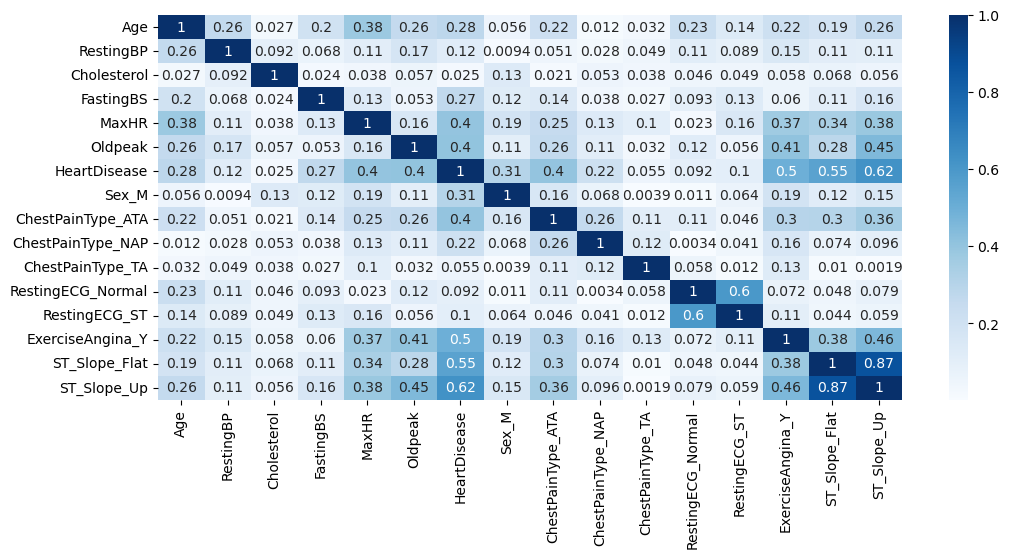

In [75]:
plt.figure(figsize=(12,5))
sns.heatmap(correlations, annot=True, cmap = "Blues")

plt.show()

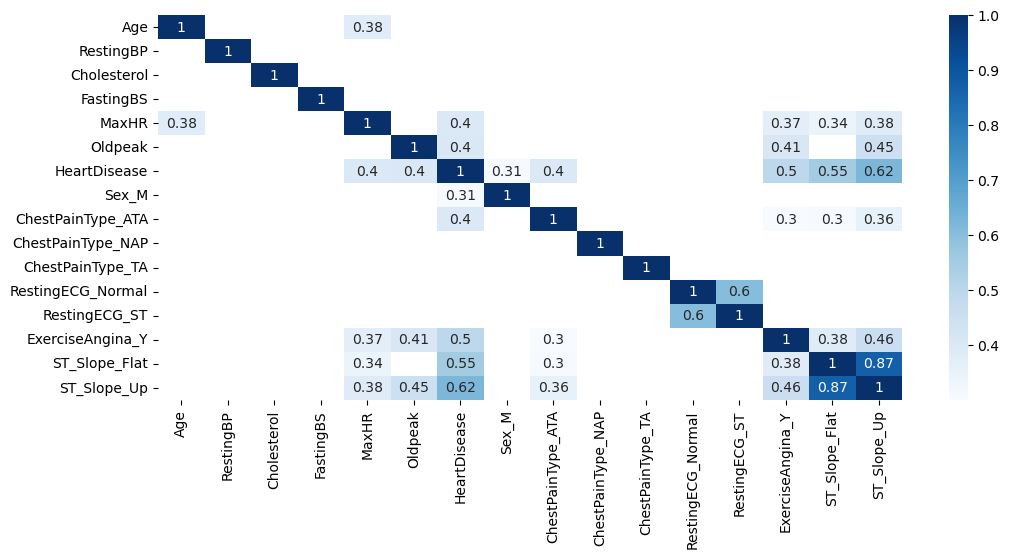

In [76]:
plt.figure(figsize=(12,5))
sns.heatmap(correlations[correlations>0.3], annot=True, cmap = "Blues")

plt.show()

In [77]:
features

['ST_Slope_Up',
 'ST_Slope_Flat',
 'ExerciseAngina_Y',
 'Oldpeak',
 'ChestPainType_ATA',
 'MaxHR',
 'Sex_M']

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.15, random_state=417)

In [80]:
X_test.shape

(138, 15)

In [81]:
X_train.shape

(779, 15)

In [82]:
y_train.shape

(779,)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn = KNeighborsClassifier(n_neighbors=3)

In [85]:
knn.fit(X_train[['ST_Slope_Up']],y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
0==0
1==0

In [87]:
knn.score(X_test[['ST_Slope_Up']], y_test)*100

55.072463768115945

In [88]:
for f in features:
    print(f)

ST_Slope_Up
ST_Slope_Flat
ExerciseAngina_Y
Oldpeak
ChestPainType_ATA
MaxHR
Sex_M


In [90]:
for f in features:
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train[[f]],y_train)
    accuracy = knn.score(X_test[[f]], y_test)*100
    print(f"Accuracy using feature {f} is {accuracy:.2f}%")

Accuracy using feature ST_Slope_Up is 55.07%
Accuracy using feature ST_Slope_Flat is 81.88%
Accuracy using feature ExerciseAngina_Y is 73.19%
Accuracy using feature Oldpeak is 58.70%
Accuracy using feature ChestPainType_ATA is 44.93%
Accuracy using feature MaxHR is 55.07%
Accuracy using feature Sex_M is 61.59%


In [91]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train[features],y_train)
accuracy = knn.score(X_test[features], y_test)*100

print(accuracy)

82.6086956521739


In [92]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
678,60,150,240,0,171,0.9,False,False,False,True,True,False,False,False,True
649,50,144,200,0,126,0.9,True,False,False,False,False,False,True,True,False
810,55,135,250,0,161,1.4,False,True,False,False,False,False,False,True,False
50,50,130,233,0,121,2.0,True,False,False,False,True,False,True,True,False
753,34,118,210,0,192,0.7,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,55,160,292,1,143,2.0,True,True,False,False,True,False,True,True,False
570,56,128,223,0,119,2.0,True,False,False,False,False,True,True,False,False
468,62,152,153,0,97,1.6,True,False,False,False,False,True,True,False,True
331,56,115,217,1,82,-1.0,True,False,False,False,False,True,False,False,True


In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
scale = MinMaxScaler()

In [98]:
X_train_scaled = scale.fit_transform(X_train[features])

In [99]:
X_train_scaled

array([[1.        , 0.        , 0.        , ..., 0.        , 0.78169014,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.46478873,
        1.        ],
       [0.        , 1.        , 0.        , ..., 1.        , 0.71126761,
        0.        ],
       ...,
       [1.        , 0.        , 1.        , ..., 0.        , 0.26056338,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.15492958,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.59859155,
        1.        ]])

In [101]:
X_test_scaled = scale.transform(X_test[features])

In [102]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
accuracy = knn.score(X_test_scaled, y_test)*100

print(accuracy)

85.5072463768116


In [103]:
from sklearn.model_selection import GridSearchCV

In [105]:
grid_param = {"n_neighbors": range(1,20),
 "metric": ['minkowski', "manhattan"]}

In [106]:
knn = KNeighborsClassifier()

In [108]:
knn_grid =  GridSearchCV(knn,grid_param,scoring  = "accuracy")

In [109]:
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

In [111]:
knn_grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 19}

In [112]:
knn_grid.best_score_

0.8407775020678248

In [113]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=19)

In [114]:
prediction = knn_grid.best_estimator_.predict(X_test_scaled)

In [115]:
prediction

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1], dtype=int64)

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
accuracy_score(prediction,y_test)

0.855072463768116